# Assignment - Analyzing Historical Stock/Revenue Data and Building Dashboard
 by Camille F. 

This program has the following objectives:
1. Extracting Tesla Stock Data using Yahoo Finance 
2. Extracting Tesla Revenue Data using Webscrapping
3. Extracting GameStop Stock Data using Yahoo Finance 
4. Extracting GameStop Revenue Data using Webscrapping 
5. Tesla Stock and Revenue Dashboard
6. GameStop and Revenue Dashboard 
7. Sharing the assignment notebook

### Question 1 - Extracting Tesla Stock Data using Yahoo Finance 

First install and import modules

In [64]:
!python -m pip install yfinance
!python -m pip install pandas
!python -m pip install requests
!python -m pip install bs4
!python -m pip install plotly
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4

zsh:1: command not found: mamba
zsh:1: command not found: mamba
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.0 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [104 lines of output]
      Building lxml version 4.6.4.
      /private/tmp/pip-install-iny5lr_h/lxml_e70faddb17a241a9ace330b286f7503c/setup.py:67: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      Building without Cython.
      Building against libxml2 2.10.4 and libxslt 1.1.37
      Building against libxml2/libxslt in one of the following directories:
        /opt/anaconda3/lib
        /opt/anaconda3/lib
        /opt/anaconda3/lib
        /opt/anaconda3/lib
        /opt/anaconda3/lib
      running bdist_wheel
      running build
      running build_py
      creating buil

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Extract TSLA ticker from Yahoo Finance as such - alternative method since the .history function isn't working D: :

In [166]:
tickers =['TSLA']
tesla_data = yf.download(tickers, group_by="ticker", period='10y')
tesla_data.reset_index(inplace = True)
tesla_data.head(5)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-17 00:00:00-04:00,15.663333,15.862000,15.366667,15.598667,15.598667,88689000
1,2014-03-18 00:00:00-04:00,15.796667,16.100000,15.668000,16.002666,16.002666,93634500
2,2014-03-19 00:00:00-04:00,16.092667,16.103333,15.567333,15.722667,15.722667,76069500
3,2014-03-20 00:00:00-04:00,15.744000,15.950000,15.557333,15.660667,15.660667,57268500
4,2014-03-21 00:00:00-04:00,15.734667,15.746667,15.166667,15.259333,15.259333,123253500


In [167]:
tesla_data.dtypes

Date         datetime64[ns, America/New_York]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Adj Close                             float64
Volume                                  int64
dtype: object

## Q2 - Obtain Tesla Revenue Data using Webscrapping

First start with the URL:

In [172]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the HTML Content

In [173]:
soup = BeautifulSoup(data, "html5lib")
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Create Empty Data Frame 

In [174]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])


Using find and all, locate the tbale body and table row, create a dataframe for data for each row, appending it successively to the tesla_revenue dataframe (there may be another way to this better but that's the easiest way I found!):

In [175]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
            tesla_revenue_data = pd.DataFrame({'Date':[Date], 'Revenue':[Revenue]})
            tesla_revenue = pd.concat([tesla_revenue, tesla_revenue_data], ignore_index=True)
            

In [176]:
tesla_revenue.tail(5)

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


## Q3 - Extract Gamestop Stock Data using Yahoo Finance

Import Data using yf module, same as above

In [178]:
tickers =['GME']
gme_data = yf.download(tickers, period='10y')
gme_data.reset_index(inplace=True)
gme_data.head(5)


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-17 00:00:00-04:00,9.7550,9.9625,9.7200,9.9375,7.220783,11348800
1,2014-03-18 00:00:00-04:00,9.4700,9.6675,9.3375,9.5975,6.973732,30610000
2,2014-03-19 00:00:00-04:00,9.6075,9.6450,9.3200,9.4025,6.832042,11680800
3,2014-03-20 00:00:00-04:00,9.3575,9.6650,9.3575,9.6100,6.982817,8980000
4,2014-03-21 00:00:00-04:00,9.6675,9.7175,9.4400,9.4550,6.870188,11760000


In [139]:
gme_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Q4 - Extract GameStop Revenue Data using Webscrapping

Obtain URL for GameStop Revenue Data:

In [105]:
#Note - this link doesn't work - waiting on Coursera team to provide one, but the concept is the same as above
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [106]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

Create an empty dataframe to initialize

In [107]:
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])
print(gme_revenue)

Empty DataFrame
Columns: [Date, Revenue]
Index: []


Same as above, using find and all, locate the tbale body and table row, create a dataframe for data for each row, appending it successively to the tesla_revenue dataframe (there may be another way to this better but that's the easiest way I found!):

In [108]:

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
            gme_revenue_row = pd.DataFrame({'Date':[Date], 'Revenue':[Revenue]})
            gme_revenue = pd.concat([gme_revenue, gme_revenue_row], ignore_index=True)

Display last 5 rows and print the table of the DataFrame 

In [179]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Q5 - Plot Tesla Stock and Revenue Graph

In [110]:
#Let's start by defining our graphing function

In [111]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2024-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), 
                             y=revenue_data_specific.Revenue.astype("float"),
                             name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    

In [159]:

print(tesla_data)

                          Date        Open        High         Low  \
0    2014-03-17 00:00:00-04:00   15.663333   15.862000   15.366667   
1    2014-03-18 00:00:00-04:00   15.796667   16.100000   15.668000   
2    2014-03-19 00:00:00-04:00   16.092667   16.103333   15.567333   
3    2014-03-20 00:00:00-04:00   15.744000   15.950000   15.557333   
4    2014-03-21 00:00:00-04:00   15.734667   15.746667   15.166667   
...                        ...         ...         ...         ...   
2512 2024-03-08 00:00:00-05:00  181.500000  182.729996  174.699997   
2513 2024-03-11 00:00:00-04:00  175.449997  182.869995  174.800003   
2514 2024-03-12 00:00:00-04:00  177.770004  179.429993  172.410004   
2515 2024-03-13 00:00:00-04:00  173.050003  176.050003  169.149994   
2516 2024-03-14 00:00:00-04:00  167.770004  171.169998  160.509995   

           Close   Adj Close     Volume  
0      15.598667   15.598667   88689000  
1      16.002666   16.002666   93634500  
2      15.722667   15.722667   76

In [182]:
tesla_data.dtypes

Date         datetime64[ns, America/New_York]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Adj Close                             float64
Volume                                  int64
dtype: object

In [183]:
tesla_revenue.reset_index(drop=True)
#Revenue are stored as objects - use this to conver to float
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'],errors = 'coerce')
tesla_revenue.dtypes
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

In [184]:
tesla_revenue.dtypes

Date        object
Revenue    float64
dtype: object

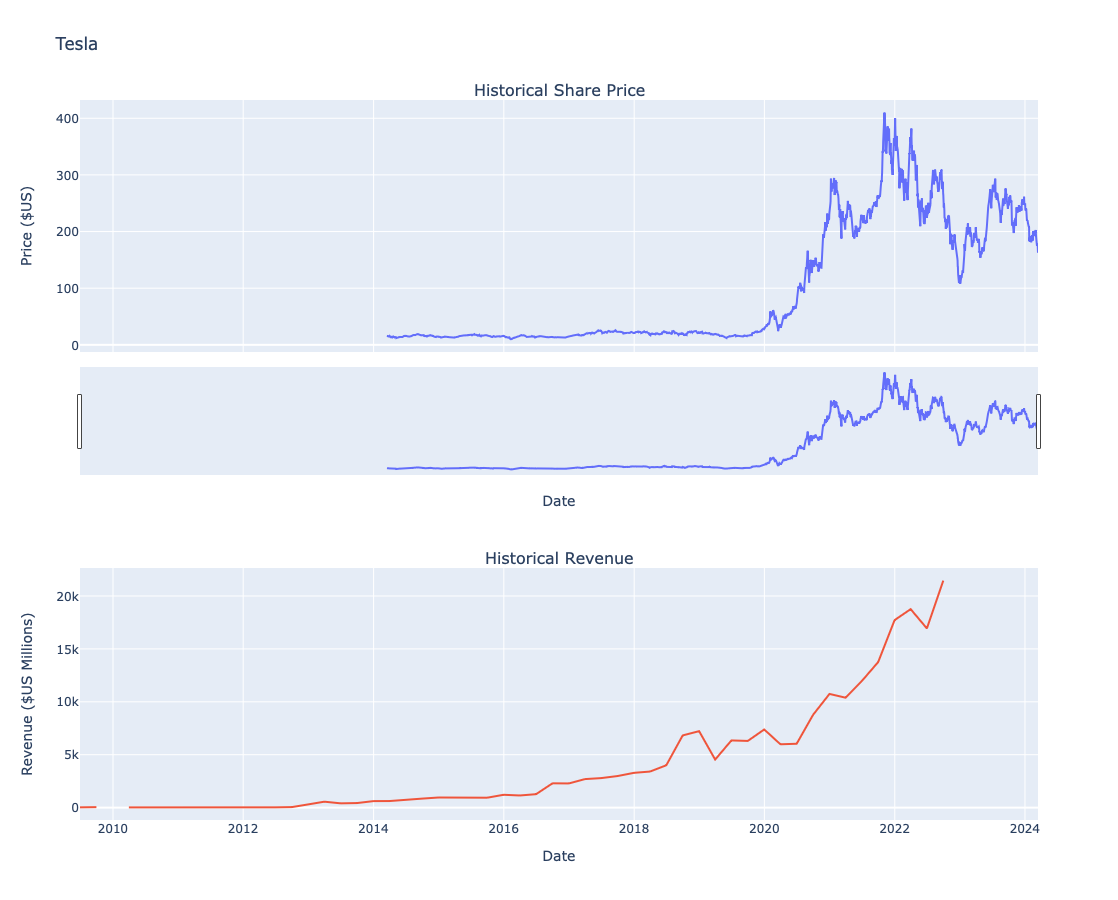

In [185]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Q6 - Plot GME Stock and Revenue Graph

We're maintaining our same graphing function - let's ensure that the types are appropriate, as we did for TSLA

In [162]:

print(gme_data)

      index                      Date     Open     High      Low    Close  \
0         0 2014-03-17 00:00:00-04:00   9.7550   9.9625   9.7200   9.9375   
1         1 2014-03-18 00:00:00-04:00   9.4700   9.6675   9.3375   9.5975   
2         2 2014-03-19 00:00:00-04:00   9.6075   9.6450   9.3200   9.4025   
3         3 2014-03-20 00:00:00-04:00   9.3575   9.6650   9.3575   9.6100   
4         4 2014-03-21 00:00:00-04:00   9.6675   9.7175   9.4400   9.4550   
...     ...                       ...      ...      ...      ...      ...   
2512   2512 2024-03-08 00:00:00-05:00  15.4000  15.6300  14.5200  14.6500   
2513   2513 2024-03-11 00:00:00-04:00  14.6400  14.9400  14.3600  14.4300   
2514   2514 2024-03-12 00:00:00-04:00  14.3500  14.8400  14.0900  14.7200   
2515   2515 2024-03-13 00:00:00-04:00  14.6900  15.2000  14.6200  14.8700   
2516   2516 2024-03-14 00:00:00-04:00  14.8000  15.0200  14.4000  14.6300   

      Adj Close    Volume  
0      7.220783  11348800  
1      6.973733  30

In [163]:
gme_data.dtypes

index                                   int64
Date         datetime64[ns, America/New_York]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Adj Close                             float64
Volume                                  int64
dtype: object

Note that we also need to convert GME Revenue data to Numeric, as follows:

In [164]:
gme_revenue.reset_index(drop = True)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'],errors = 'coerce')
gme_revenue.dtypes

Date       object
Revenue     int64
dtype: object

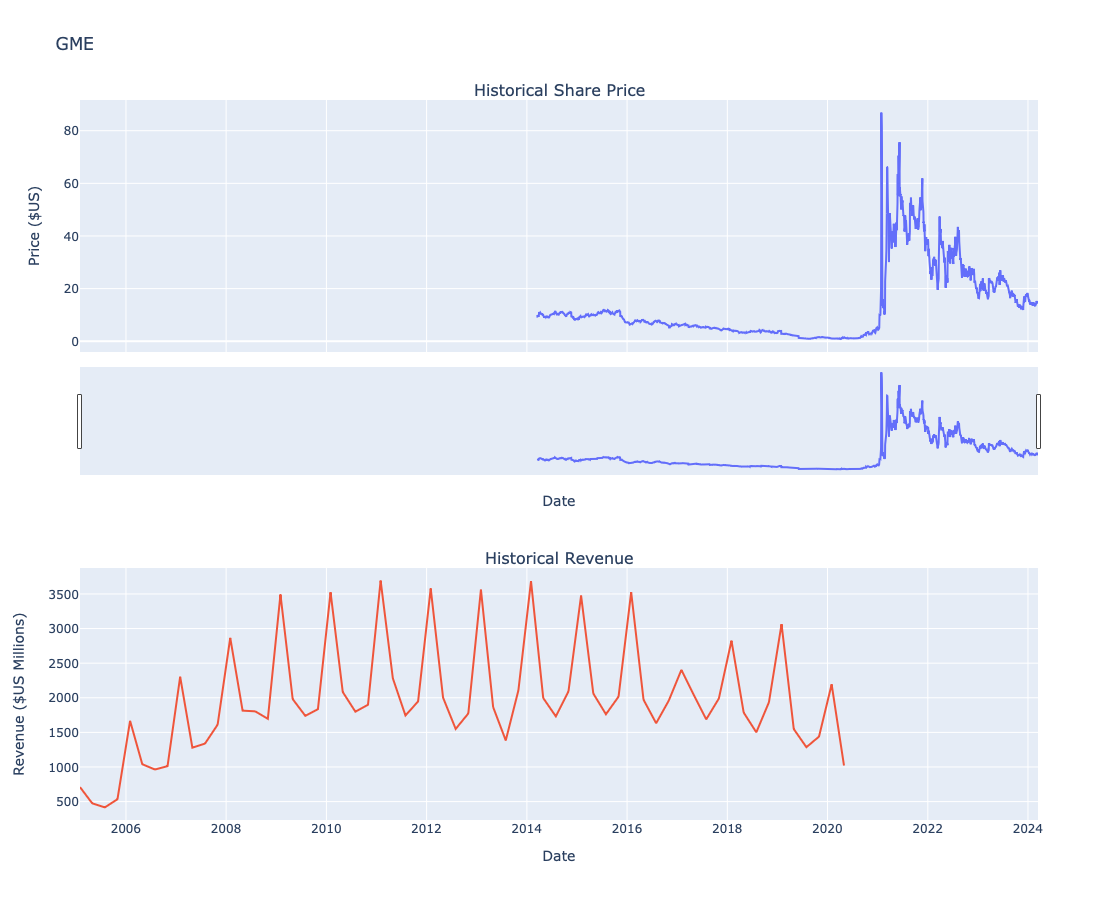

In [165]:
make_graph(gme_data, gme_revenue, 'GME')

LOL this revenue pattern... 